# CommentScraper

In [ ]:
import requests
import re
import json
from bs4 import BeautifulSoup
from collatex import *
from sklearn import tree

In [2]:
list_of_url = [
            "https://www.espn.com/soccer/commentary?gameId=541728",
            "https://www.espn.com/soccer/commentary?gameId=541726",
            "https://www.espn.com/soccer/commentary?gameId=541731",
            "https://www.espn.com/soccer/commentary?gameId=541748",
            "https://www.espn.com/soccer/commentary?gameId=541738",
            "https://www.espn.com/soccer/commentary?gameId=541736",
            "https://www.espn.com/soccer/commentary?gameId=541741"
        ]
for url in list_of_url:
        response = requests.get(url)
        if response.status_code != 200:
            raise Exception('Sites are not reachable')

# Produce JSON
A json file with comments in urls.
The following format is needed by collatex library.

In [3]:
comments_dict = {}
comments_dict["witnesses"] = []
id = 0
for url in list_of_url:
    print("...Processing:", url)
    website = requests.get(url)
    soup = BeautifulSoup(website.text, "html.parser")
    container = soup.find('div', {"id": "match-commentary-1-tab-1"})
    for td in container.find_all('td', {"class": "game-details"}):
        comment_cleaned = re.sub("\t", "", re.sub("\n", "", td.text))[4:-8]
        comments_dict["witnesses"].append({'id': str(id), 'content': comment_cleaned})
        id += 1
print("Processing completed")
        
json_file_name = "comments.json"
with open(json_file_name, "w+") as out_file:
    json.dump(comments_dict, out_file, indent=4)

...Processing: https://www.espn.com/soccer/commentary?gameId=541728
...Processing: https://www.espn.com/soccer/commentary?gameId=541726
...Processing: https://www.espn.com/soccer/commentary?gameId=541731
...Processing: https://www.espn.com/soccer/commentary?gameId=541748
...Processing: https://www.espn.com/soccer/commentary?gameId=541738
...Processing: https://www.espn.com/soccer/commentary?gameId=541736
...Processing: https://www.espn.com/soccer/commentary?gameId=541741
Processing completed


# Comment extractor
A extractor by keywords

In [12]:
with open(json_file_name, "r+") as in_file:
    data = json.load(in_file)

keyword = "pass"
grouped_list = []
for element in data["witnesses"]:
    if keyword in element["content"]:
        grouped_list.append(element)

[{'id': '32', 'content': 'Attempt saved. Pascal Groß (Brighton and Hove Albion) header from the centre of the box is saved in the centre of the goal. Assisted by Steven Alzate with a headed pass.'}, {'id': '162', 'content': 'Adama Traoré (Wolverhampton Wanderers) hits the bar with a right footed shot from the right side of the box. Assisted by Matt Doherty with a headed pass.'}, {'id': '327', 'content': 'Attempt blocked. Wilfried Zaha (Crystal Palace) left footed shot from the centre of the box is blocked. Assisted by Christian Benteke with a headed pass.'}, {'id': '420', 'content': 'Goal!  Arsenal 1, Crystal Palace 0. Sokratis (Arsenal) right footed shot from the centre of the box to the bottom right corner. Assisted by Granit Xhaka with a headed pass following a corner.'}, {'id': '481', 'content': 'Attempt saved. Sadio Mané (Liverpool) left footed shot from outside the box is saved in the bottom left corner. Assisted by Adam Lallana with a headed pass.'}, {'id': '533', 'content': 'At

# Collatex Visualization
A collatex representation of comments in resulting json file, passed grouped by keyword


(dot.exe:1244): Pango-WARNING **: couldn't load font "Bukyvede Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


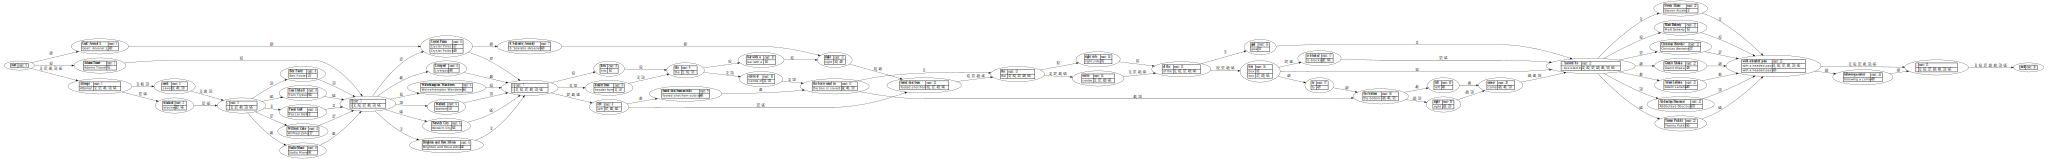

In [ ]:
collation = Collation()
for element in grouped_list:
    collation.add_plain_witness(element["id"], element["content"])

collate(collation, output="svg")